### Predição de preço de casas utilizando o Scikit-Learn

In [67]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [68]:
# O dataset usado é um de exemplo vindo do próprio Sklearn
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR) # Descrição do dataset e legenda das siglas

df = pd.DataFrame(boston.data) # Converte os dados em um dataframe do Pandas
df.columns = boston.feature_names # Para melhor compreensão, muda-se o nome das colunas, de números para as feature names
df["PRICE"] = boston.target # Adiciona o preço das casas no dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [69]:
from sklearn.linear_model import LinearRegression
eixo_x = df.drop("PRICE", axis = 1)
eixo_y = df.PRICE


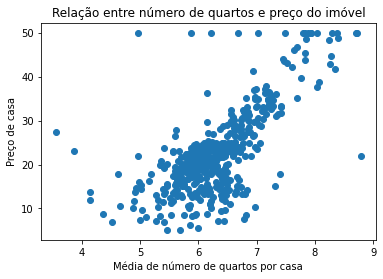

In [70]:
plt.scatter(df.RM, eixo_y)
plt.xlabel("Média de número de quartos por casa")
plt.ylabel("Preço de casa")
plt.title("Relação entre número de quartos e preço do imóvel")
plt.show()

In [71]:
regr = LinearRegression()
regr.fit(eixo_x, eixo_y)
regr.predict(eixo_x)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [72]:
# Correção do MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(eixo_x)) ** 2)

# Aplicação da regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(eixo_x[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(eixo_x[['PTRATIO']])) ** 2)


62.65220001376924


In [73]:
# Divisão dos dados entre treino e teste
x_treino = eixo_x[:-50]
x_teste = eixo_x[-50:]

y_treino = df.PRICE[:-50]
y_teste = df.PRICE[-50:]

In [75]:
# Seleção aleatória dos dados para treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(eixo_x, df.PRICE, test_size = 0.3, random_state = 5) # 70% dos dados vão para treino e os dados serão completamente aleatorizado

regr = LinearRegression()
regr.fit(x_treino, y_treino)

pred_treino = regr.predict(x_treino)
pred_teste = regr.predict(x_teste)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

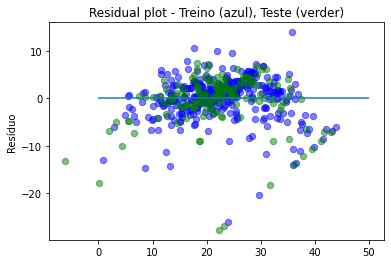

In [77]:
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c = "b", s = 40, alpha = 0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c = "g", s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual plot - Treino (azul), Teste (verde)")
plt.show